# **HW 1**

In [1]:
from re import L
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
import csv

In [ ]:
xyz_curves = "/content/cieXYZ_curves.csv"
csvfile = pd.read_csv(xyz_curves)
print(csvfile)

# print(csvfile.iloc[:, 0])

lambda_x = csvfile.iloc[:, 1]

for value in lambda_x:
    print(value)

## **Step 1**

In [3]:
h = 6.62606957e-34
c = 299792458
k_B = 1.3806488e-23

step = 10
linspaceArg = round(((30000-1000)/ step)+1)
temps = np.linspace(1000, 30000, linspaceArg)

lambda_nm = csvfile.iloc[:, 0]
lambda_x = csvfile.iloc[:, 1]
lambda_y = csvfile.iloc[:, 2]
lambda_z = csvfile.iloc[:, 3]

# Μετατροπή nm -> m
lambda_m = lambda_nm.to_numpy() * 1e-9

def planck_radiance(lambda_m, T):
    return 2*h*c**2 / ((lambda_m**5) * (np.exp((h*c)/(lambda_m*k_B*T)) - 1))  # B_T(λ) for every λ

# Υπολογισμός (X, Y, Z) με διακριτό άθροισμα
def XYZ_calc(T):
    B = planck_radiance(lambda_m, T)
    step_of_L_m = lambda_nm[1]-lambda_nm[0]
    X = np.sum(B * lambda_x)*step_of_L_m
    Y = np.sum(B * lambda_y)*step_of_L_m
    Z = np.sum(B * lambda_z)*step_of_L_m
    return X, Y, Z

## **Step 2**

In [4]:
curves_x = []
curves_y = []
curves_T = []
for T in temps:
    X, Y, Z = XYZ_calc(T)

    # Normalization (x, y)
    s = (X + Y + Z)
    x = X / s
    y = Y / s

    # print(f"for T = {T} K, the x = {x}, y = {y}")

    # c = round(1000*x)
    # r = round(1000*y)

    curves_x.append(round(1000*x))
    curves_y.append(round(1000*y))
    curves_T.append(T)

curves_x_50 = curves_x[:50]
curves_y_50 = curves_y[:50]
curves_T_50 = curves_T[:50]
for T, x, y in zip(curves_T_50, curves_x_50, curves_y_50):
    print(f"for T = {T} K, the x = {x}, y = {y}")

for T = 1000.0 K, the x = 652, y = 345
for T = 1010.0 K, the x = 651, y = 346
for T = 1020.0 K, the x = 650, y = 347
for T = 1030.0 K, the x = 648, y = 349
for T = 1040.0 K, the x = 647, y = 350
for T = 1050.0 K, the x = 645, y = 351
for T = 1060.0 K, the x = 644, y = 352
for T = 1070.0 K, the x = 643, y = 353
for T = 1080.0 K, the x = 641, y = 355
for T = 1090.0 K, the x = 640, y = 356
for T = 1100.0 K, the x = 638, y = 357
for T = 1110.0 K, the x = 637, y = 358
for T = 1120.0 K, the x = 636, y = 359
for T = 1130.0 K, the x = 634, y = 360
for T = 1140.0 K, the x = 633, y = 361
for T = 1150.0 K, the x = 632, y = 362
for T = 1160.0 K, the x = 630, y = 363
for T = 1170.0 K, the x = 629, y = 365
for T = 1180.0 K, the x = 627, y = 366
for T = 1190.0 K, the x = 626, y = 367
for T = 1200.0 K, the x = 625, y = 368
for T = 1210.0 K, the x = 623, y = 369
for T = 1220.0 K, the x = 622, y = 370
for T = 1230.0 K, the x = 621, y = 371
for T = 1240.0 K, the x = 619, y = 372
for T = 1250.0 K, the x =

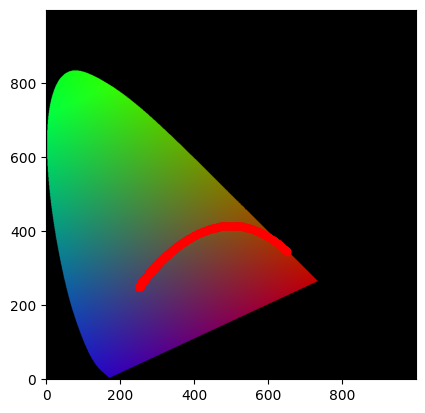

In [5]:
chroma_diagram = cv2.imread('chromaDiagram.png')
chroma_diagram = cv2.cvtColor(chroma_diagram, cv2.COLOR_BGR2RGB)
plt.imshow(chroma_diagram)
plt.scatter(curves_x, curves_y, c='red', s=20)
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.show()

Conversion of (curves_x, curves_y) to NumPy array for Step 6

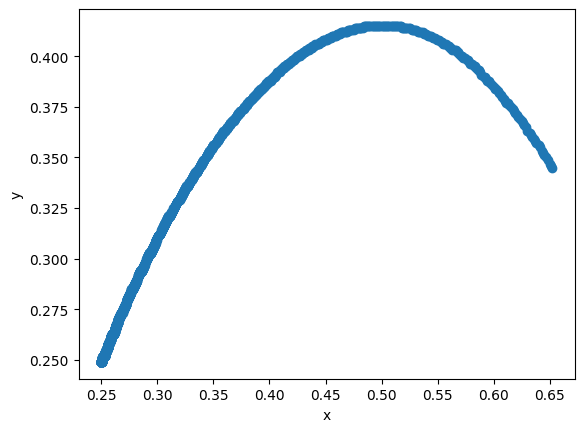

In [6]:
curves_x_np = np.array(curves_x) / 1000
curves_y_np = np.array(curves_y) / 1000
x_flat = curves_x_np.flatten()
y_flat = curves_y_np.flatten()
plt.figure()
plt.scatter(x_flat, y_flat)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## **Step 3**

### 3.1 Using Colour

In [7]:
!pip install colour-science colour-demosaicing
!pip install colour-demosaicing

import colour

from colour_demosaicing import (
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

colour.plotting.colour_style();
colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.6                                                        *
*       colour-demosaicing : 0.2.6                                            *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.37.0                                                      *
*       matplotlib : 3.10.0                                                   *
*       networkx : 3.4.2                                                      *
*       numpy : 2.0.2                   

/usr/local/lib/python3.11/dist-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028


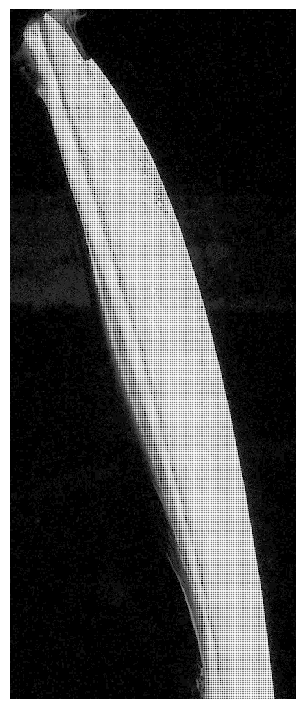

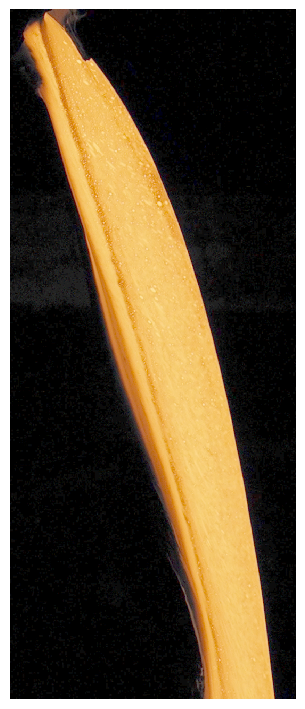

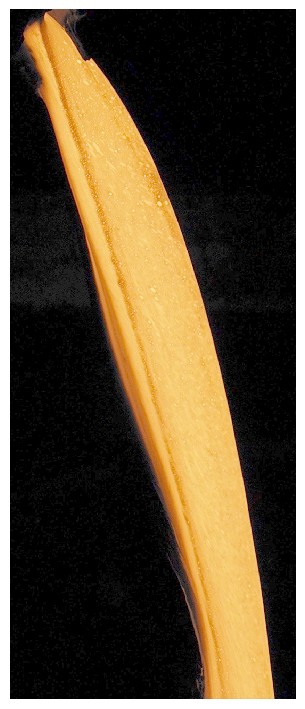

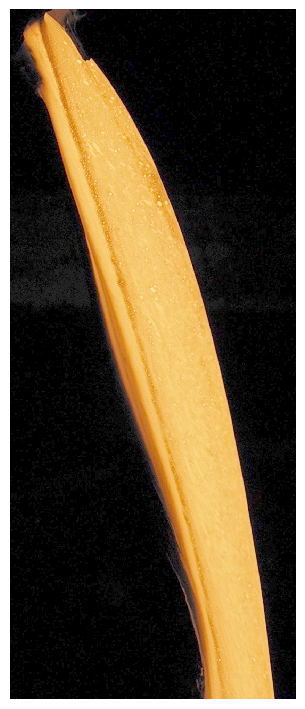

In [8]:
CFA = colour.io.read_image('CFA_stream.png')

colour.plotting.plot_image(
    colour.cctf_encoding(CFA))


colour.plotting.plot_image(
    colour.cctf_encoding(demosaicing_CFA_Bayer_bilinear(CFA, 'GBRG')));


colour.plotting.plot_image(
    colour.cctf_encoding(demosaicing_CFA_Bayer_Malvar2004(CFA, 'GBRG')));

image_rgb_colour = colour.cctf_encoding(demosaicing_CFA_Bayer_Menon2007(CFA, 'GBRG'))

colour.plotting.plot_image(image_rgb_colour);

# height, width = CFA.shape
# print(height)
# cv2_imshow(CFA)

### 3.2 Using Opencv

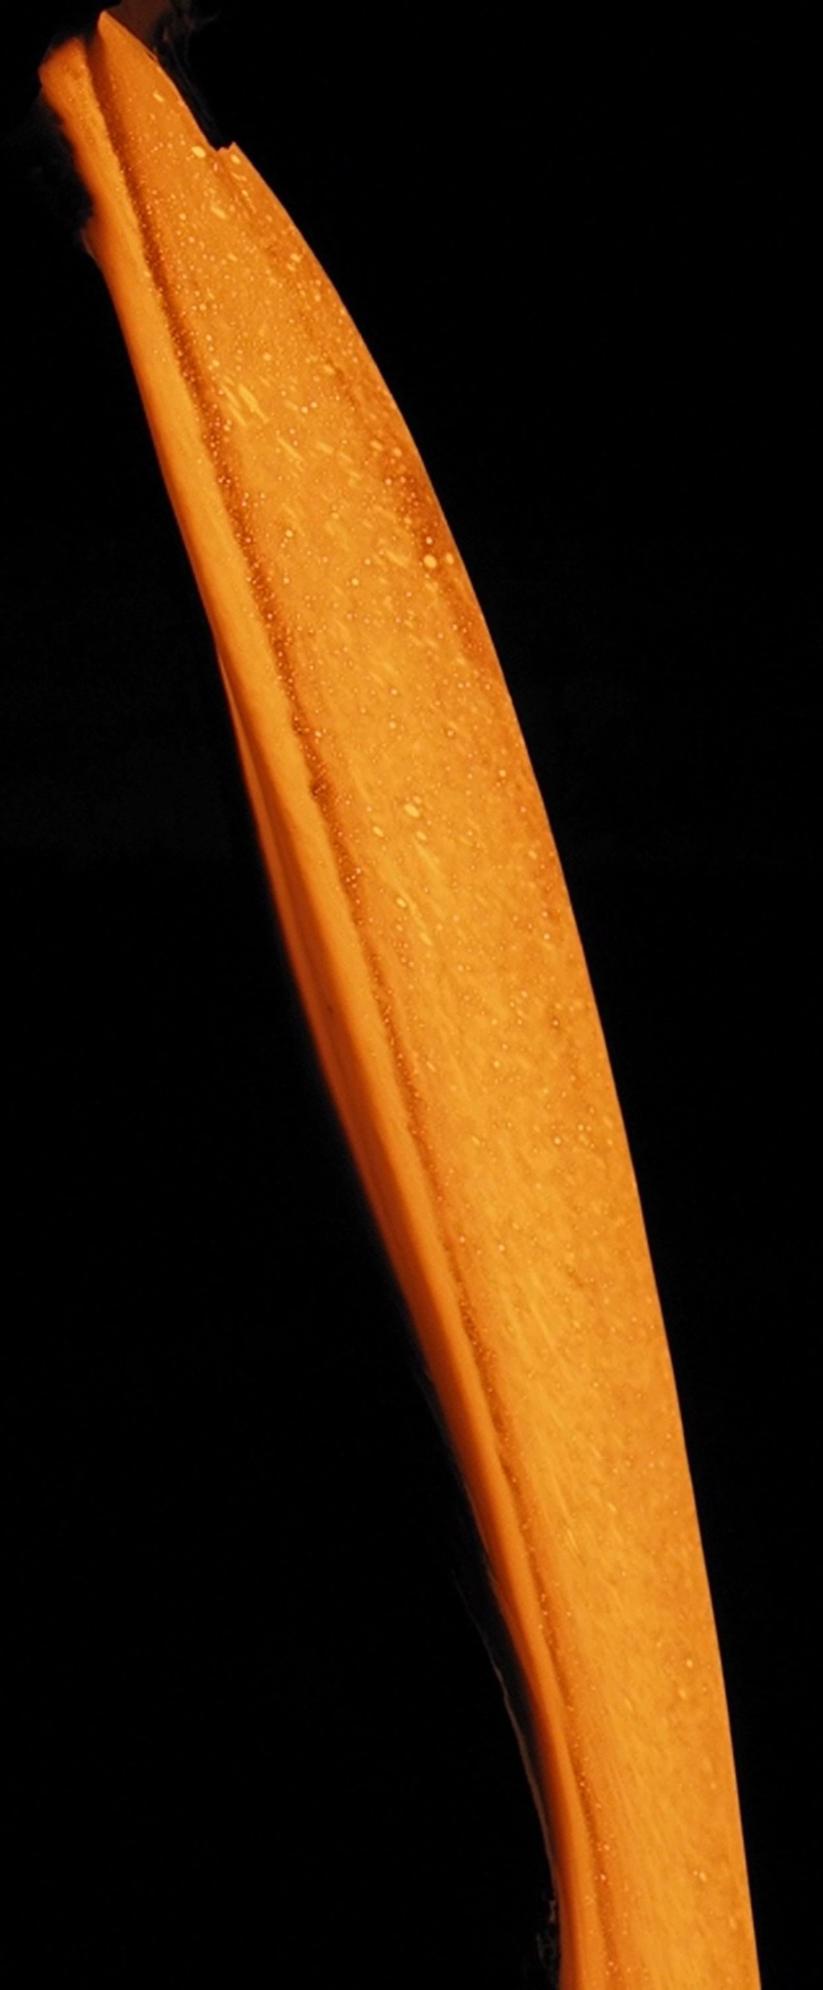

In [9]:
# image = cv2.imread('CFA_stream.png')
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.imread('CFA_stream.png',cv2.IMREAD_GRAYSCALE)

image_demosaiced = cv2.cvtColor(image_gray, cv2.COLOR_BayerGR2RGB) # COLOR_BayerGB2RGB
image_rgb_cv = image_demosaiced
image_gbr = cv2.cvtColor(image_rgb_cv, cv2.COLOR_RGB2BGR)

cv2_imshow(image_gbr)

## **Step 4**

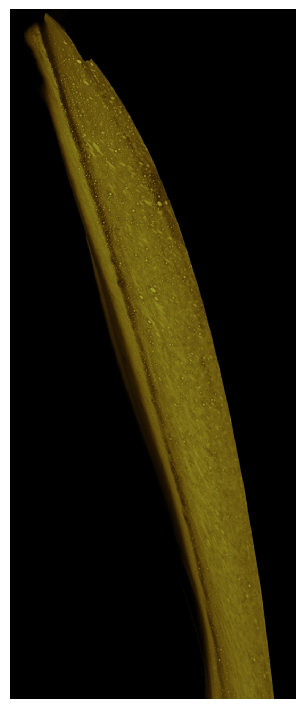

0.687115999754


In [10]:
img_rgb = image_rgb_cv.astype(np.float32) / 255.0 # Η colour διαβαζει το rgb οχι το bgr image

image_xyz = colour.models.sRGB_to_XYZ(img_rgb)

# image_xyz = colour.models.sRGB_to_XYZ(image_rgb)

colour.plotting.plot_image(image_xyz);
print(np.max(image_xyz))

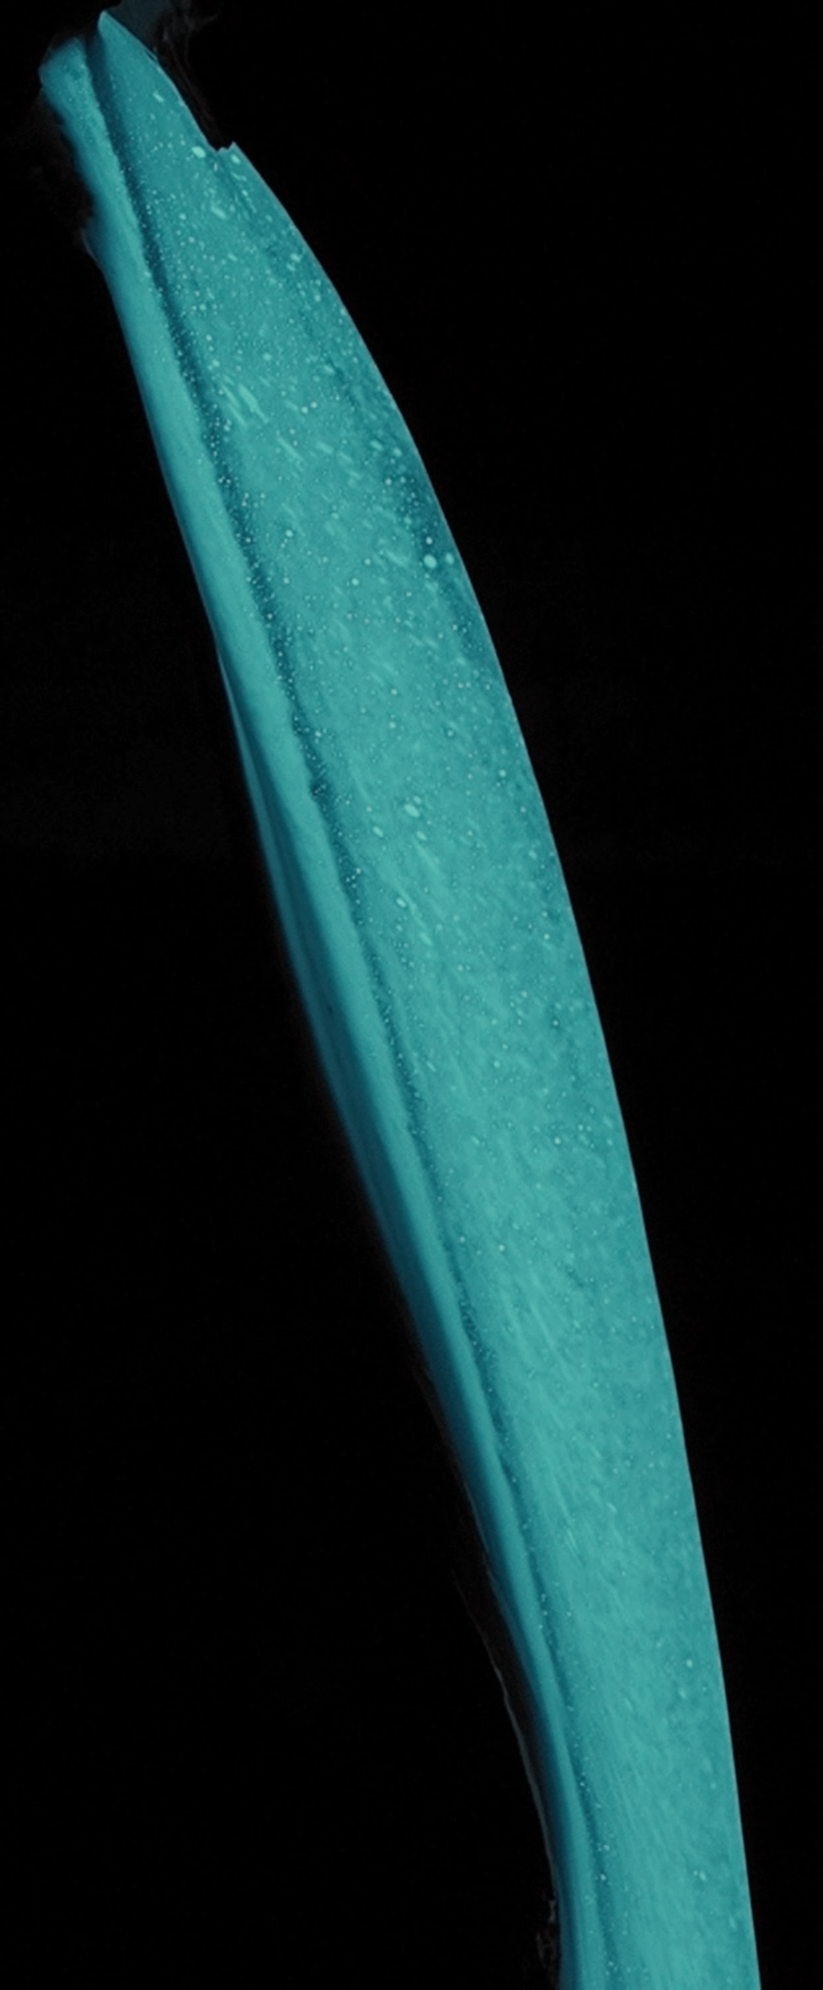

In [11]:
image_xyz_cv = cv2.cvtColor(image_rgb_cv, cv2.COLOR_RGB2XYZ)
cv2_imshow(image_xyz_cv) # in GBR

## **Step 5**

Μέσο RGB: [ 41.48228445  40.87206262  14.81570367]


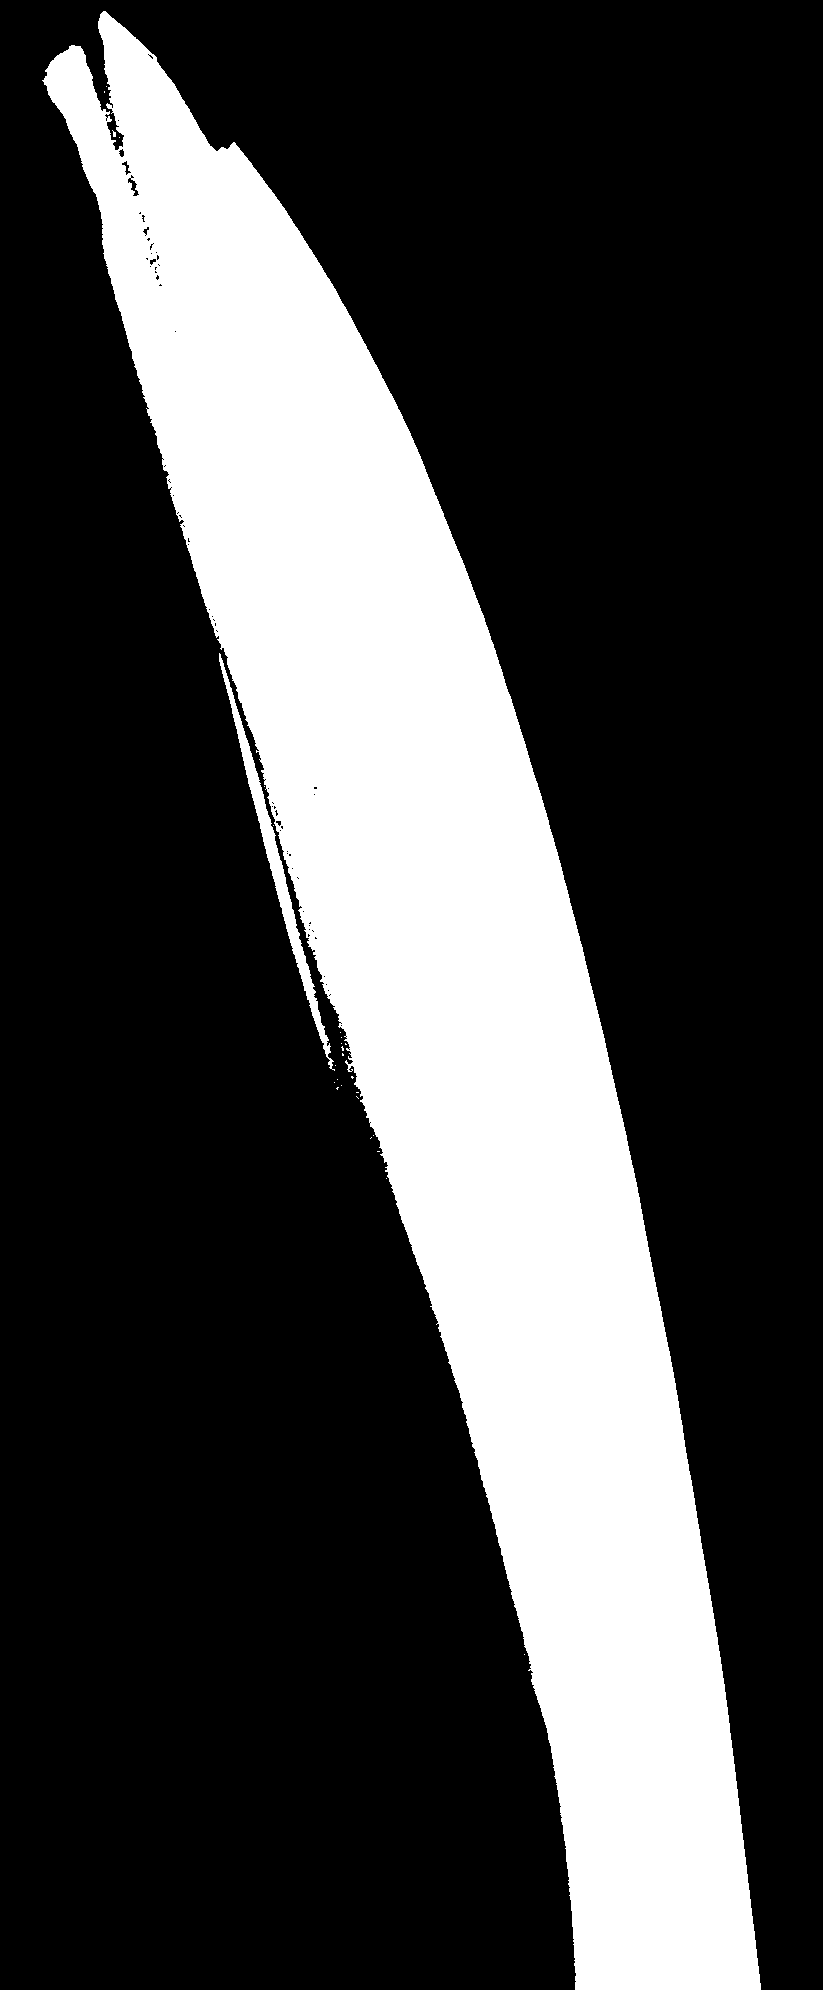

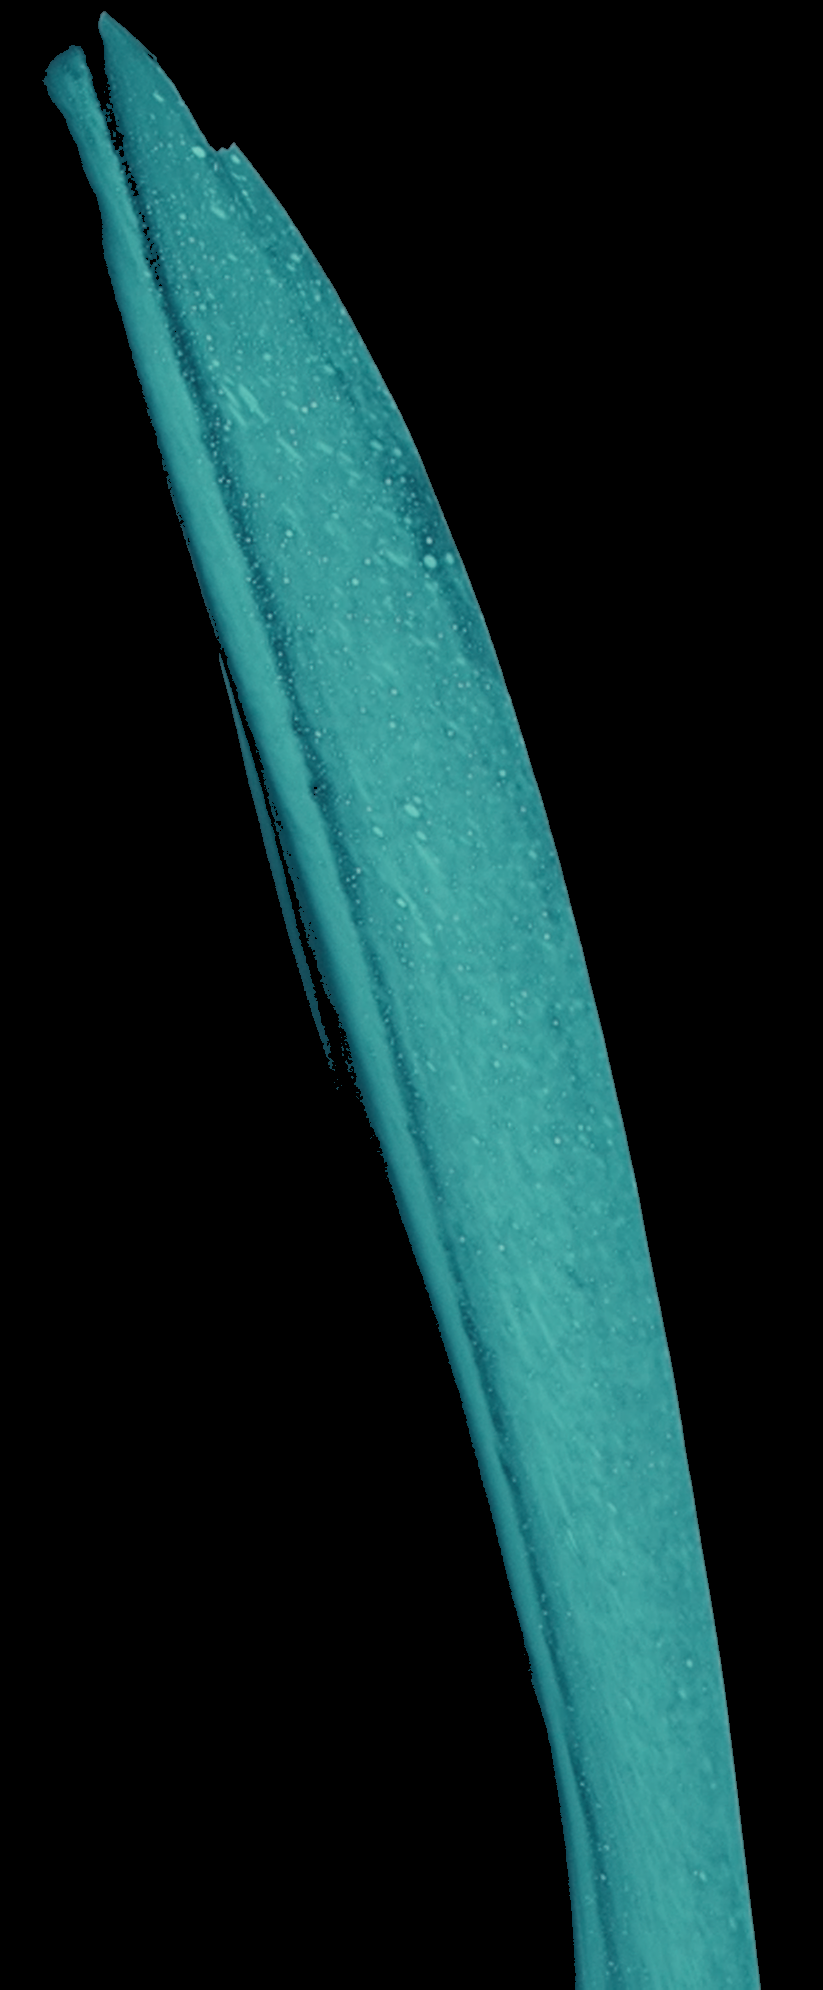

In [12]:
# cv2_imshow(image_rgb_cv)

mean_rgb = np.mean(image_xyz_cv, axis=(0, 1))
print("Μέσο RGB:", mean_rgb)

# mask_r = cv2.inRange(image_rgb_cv[:,:,0],0,20)
# mask_g = cv2.inRange(image_rgb_cv[:,:,1],0,70)
# mask_b = cv2.inRange(image_rgb_cv[:,:,2],0,130)
# cv2_imshow(mask_b)
# mask_r = cv2.bitwise_not(mask_r)
# mask_g = cv2.bitwise_not(mask_r)
# mask_b = cv2.bitwise_not(mask_r)

# result = cv2.bitwise_and(image_rgb_cv,image_rgb_cv,mask = mask_r & mask_g & mask_b) # ???????????????????????????????????????????
# cv2_imshow(result)


min_rgb = np.array([0, 0, 0])
max_rgb = np.array([255, 70, 130])
mask = cv2.inRange(image_xyz_cv, min_rgb, max_rgb)
inverted_mask = cv2.bitwise_not(mask)
cv2_imshow(inverted_mask)

image_xyz_masked = cv2.bitwise_and(image_xyz_cv, image_xyz_cv, mask=inverted_mask)
cv2_imshow(image_xyz_masked)

## **Step 6**

In [13]:
import math

# Normalization
Xs = image_xyz_masked[:, :, 0] / 255
Ys = image_xyz_masked[:, :, 1] / 255
Zs = image_xyz_masked[:, :, 2] / 255

s_image = Xs + Ys + Zs

print(np.max(Xs), np.max(Ys), np.max(Zs))
print(s_image[100])

x_image_clean_valid = np.nan_to_num(Xs / s_image, nan=0.0, posinf=0.0, neginf=0.0)
y_image_clean_valid = np.nan_to_num(Ys / s_image, nan=0.0, posinf=0.0, neginf=0.0)

x_image_clean = Xs / s_image
y_image_clean = Ys / s_image

# x,y in range of (0, 255) or (0, 1) ????????????????
print("s_image range:", np.nanmin(s_image), np.nanmax(s_image))
print("x_image_clean range:", np.min(x_image_clean_valid), np.max(x_image_clean_valid))
print("y_image_clean range:", np.min(y_image_clean_valid), np.max(y_image_clean_valid))


# mask = ~np.isnan(x_image) & ~np.isnan(y_image)
# x_image_clean = x_image[mask]
# y_image_clean = y_image[mask]

0.776470588235 0.83137254902 0.545098039216
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.70980392  0.74117647
  0.77254902  0.80392157  0.83529412  0.85882353  0.88627451  0.92156863
  0.94901961  1.00392157  1.08235294  1.1254902   1.13333333  1.10588235
  1.0627451   1.03137255  1.07843137  1.18431373  1.22352941  1.13333333
  1.01960784  0.97254902  1.03137255  1.14901961  1.25882353  1.28627451
  1.27843137  1.24705882  1.18431373  1.1372549   1.14117647  1.1686274

<ipython-input-13-a734612f0b79>:13: RuntimeWarning: invalid value encountered in divide
  x_image_clean_valid = np.nan_to_num(Xs / s_image, nan=0.0, posinf=0.0, neginf=0.0)
<ipython-input-13-a734612f0b79>:14: RuntimeWarning: invalid value encountered in divide
  y_image_clean_valid = np.nan_to_num(Ys / s_image, nan=0.0, posinf=0.0, neginf=0.0)


s_image range: 0.0 2.0862745098
x_image_clean range: 0.0 0.529411764706
y_image_clean range: 0.0 0.464419475655


<ipython-input-13-a734612f0b79>:16: RuntimeWarning: invalid value encountered in divide
  x_image_clean = Xs / s_image
<ipython-input-13-a734612f0b79>:17: RuntimeWarning: invalid value encountered in divide
  y_image_clean = Ys / s_image


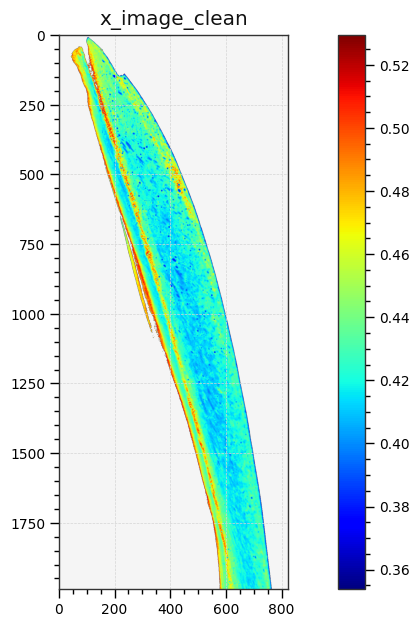

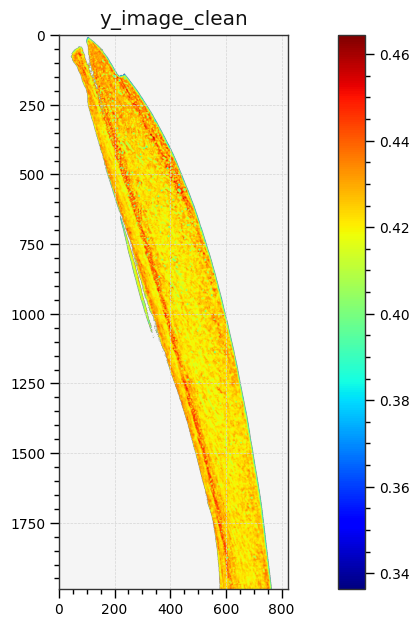

In [14]:
plt.figure()
plt.imshow(x_image_clean, cmap='jet')
plt.colorbar()
plt.title("x_image_clean")
plt.show()
plt.figure()
plt.imshow(y_image_clean, cmap='jet')
plt.colorbar()
plt.title("y_image_clean")
plt.show()

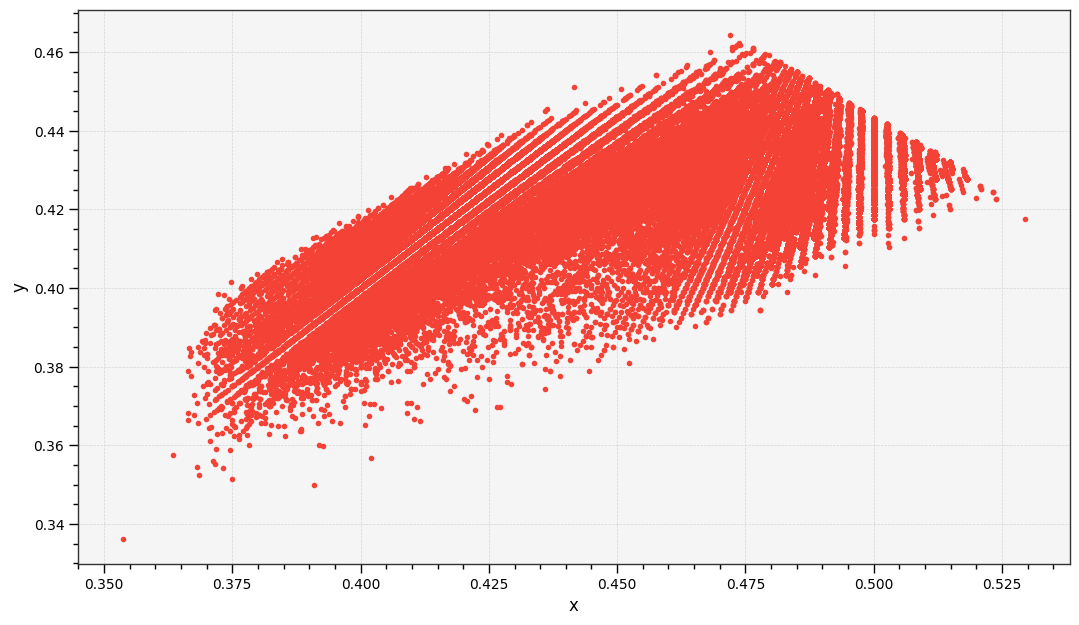

In [15]:
x_flat = x_image_clean.flatten()
y_flat = y_image_clean.flatten()
plt.figure()
plt.scatter(x_flat, y_flat)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [32]:
def xy_to_CCT_mccamy(x, y):
    """
    Compute approximate correlated color temperature (CCT in K)
    from CIE 1931 xy using McCamy's formula.
    Returns nan if x, y are out of typical range or cause a division by zero.
    """
    # Avoid division by zero or invalid ranges:
    # For instance, if (x < 1e-8) or (y < 1e-8), or if y ~ 0.1858, handle carefully
    valid_mask = (abs(0.1858 - y_image_clean) > 1e-8)
    print("Number of valid pixels:", np.sum(valid_mask))

    cct = np.full_like(x, np.nan, dtype=np.float64)

    # Compute n only where valid
    n = (x[valid_mask] - 0.3320) / (0.1858 - y[valid_mask])
    cct[valid_mask] = (437 * n**3 + 3601 * n**2 + 6861 * n + 5514.31)

    return cct

temperature_image = xy_to_CCT_mccamy(x_image_clean, y_image_clean)

Number of valid pixels: 440946


In [16]:
import numpy as np
from scipy.spatial import cKDTree

# Create a boolean mask where both x and y are finite (i.e. not NaN or infinite)
valid_mask = np.isfinite(x_image_clean) & np.isfinite(y_image_clean)

# Build the lookup table for the original coordinates from your curves arrays
lookup_coords = np.vstack((curves_x_np, curves_y_np)).T

# Build the cKDTree for efficient nearest-neighbor lookup
tree = cKDTree(lookup_coords)

# Extract the valid pixel coordinates (flattening using the mask)
pixel_coords_valid = np.column_stack((x_image_clean[valid_mask], y_image_clean[valid_mask]))

# Query the tree to find the nearest original (x,y) for each valid pixel
_, indices = tree.query(pixel_coords_valid)

# Ensure curves_T is a NumPy array for proper indexing
curves_T = np.array(curves_T)

# Get the corresponding temperatures for the valid pixels
valid_temps = curves_T[indices]

# Create a masked array for the temperature map:
# First, create an array with the same shape as x_image.
temp_map = np.empty_like(x_image_clean, dtype=float)

# Fill valid positions with the computed temperatures.
# (The invalid positions will remain uninitialized for now.)
temp_map[valid_mask] = valid_temps

# Now mask out the invalid positions so they are not used in further analysis.
temperature_map = np.ma.masked_array(temp_map, mask=~valid_mask)

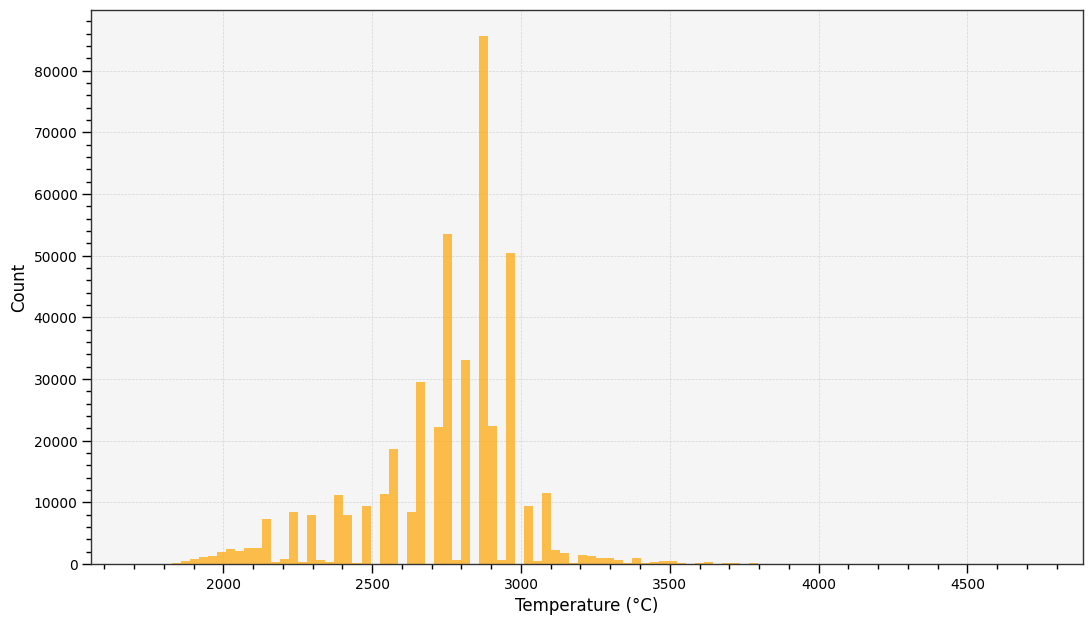

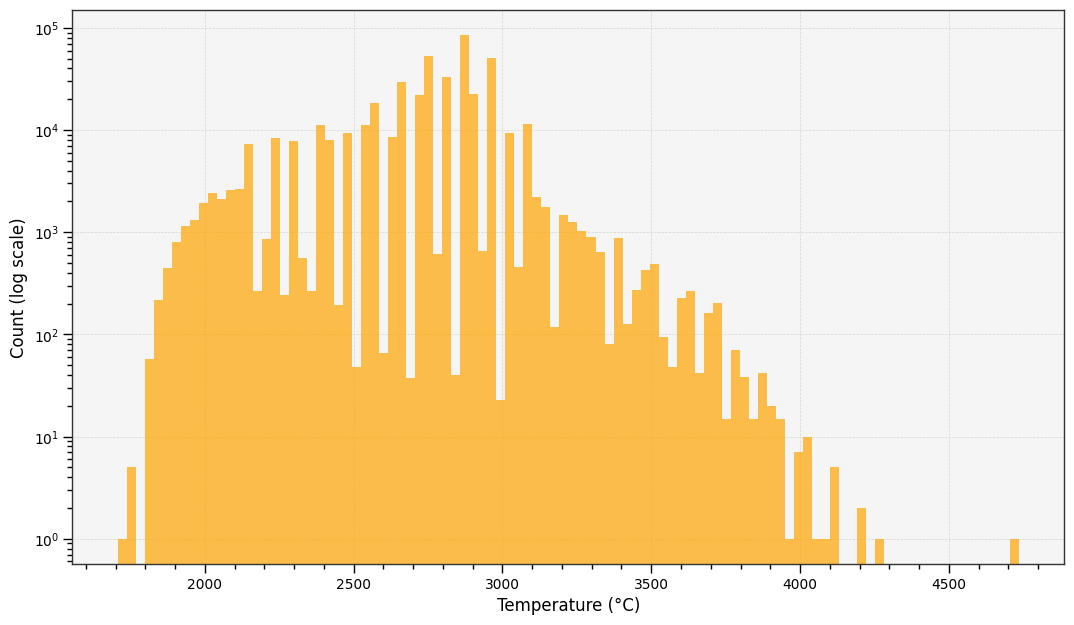

In [24]:
temp_celsius = temperature_map - 273.15

# Flatten the array to 1D (excluding nans) for histogram
valid_temps = temp_celsius[~np.isnan(temp_celsius)]

plt.hist(valid_temps, bins=100, color='orange', alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

plt.hist(valid_temps, bins=100, color='orange', alpha=0.7)
plt.yscale('log')
plt.xlabel("Temperature (°C)")
plt.ylabel("Count (log scale)")
plt.show()

In [25]:
print("temperature_image range:",
      np.nanmin(temp_celsius),
      np.nanmax(temp_celsius))

mean_temp_c = np.nanmean(temp_celsius)
print("Mean temperature (°C):", mean_temp_c)

temperature_image range: 1706.85 4736.85
Mean temperature (°C): 2742.56310319


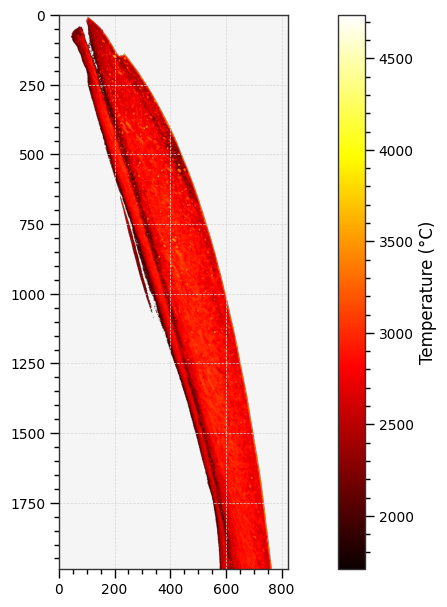

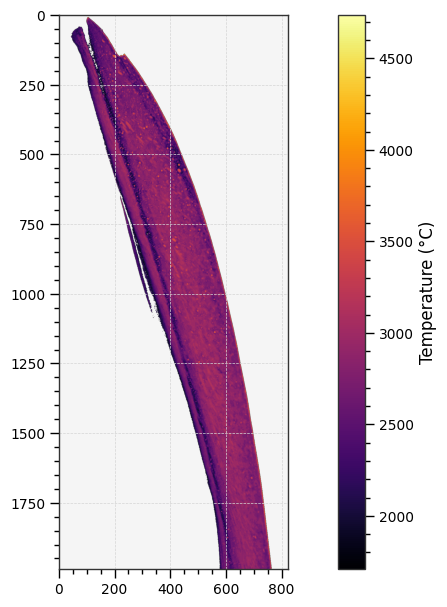

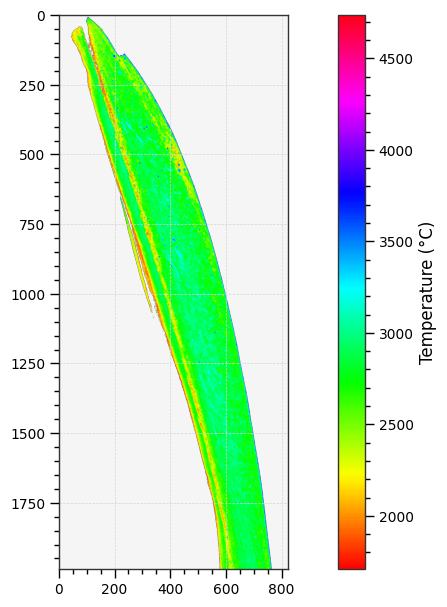

In [22]:
plt.imshow(temp_celsius, cmap='hot', origin='lower')
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label="Temperature (°C)")
plt.show()

plt.imshow(temp_celsius, cmap='inferno', origin='lower')
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label='Temperature (°C)')
plt.show()

plt.imshow(temp_celsius, cmap='hsv', origin='lower')
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label='Temperature (°C)')
plt.show()

## **Step 7**

### 7.1 Histogram

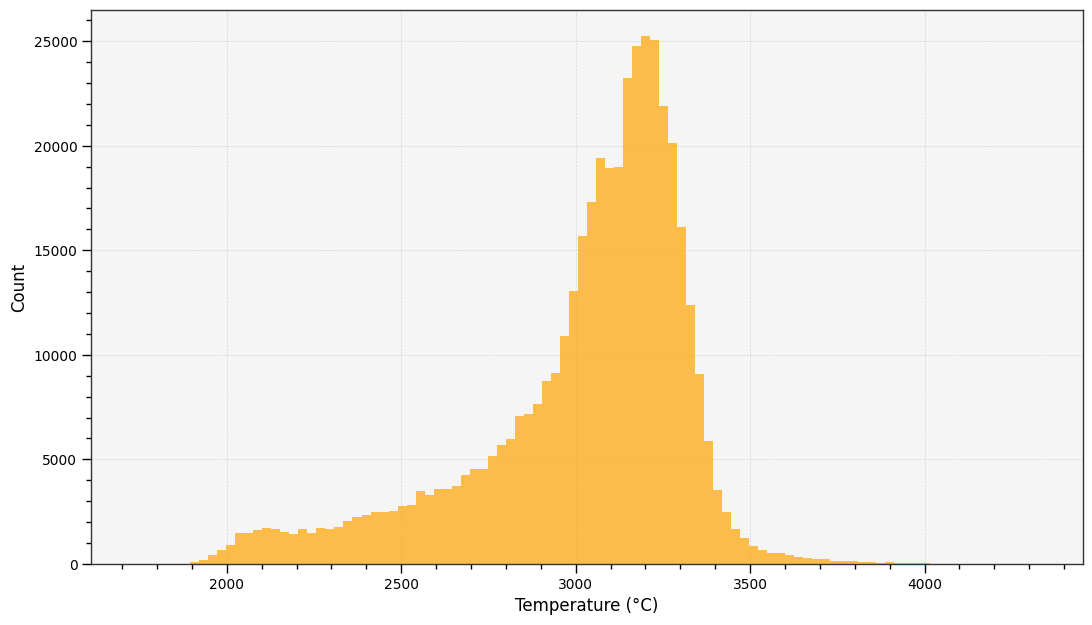

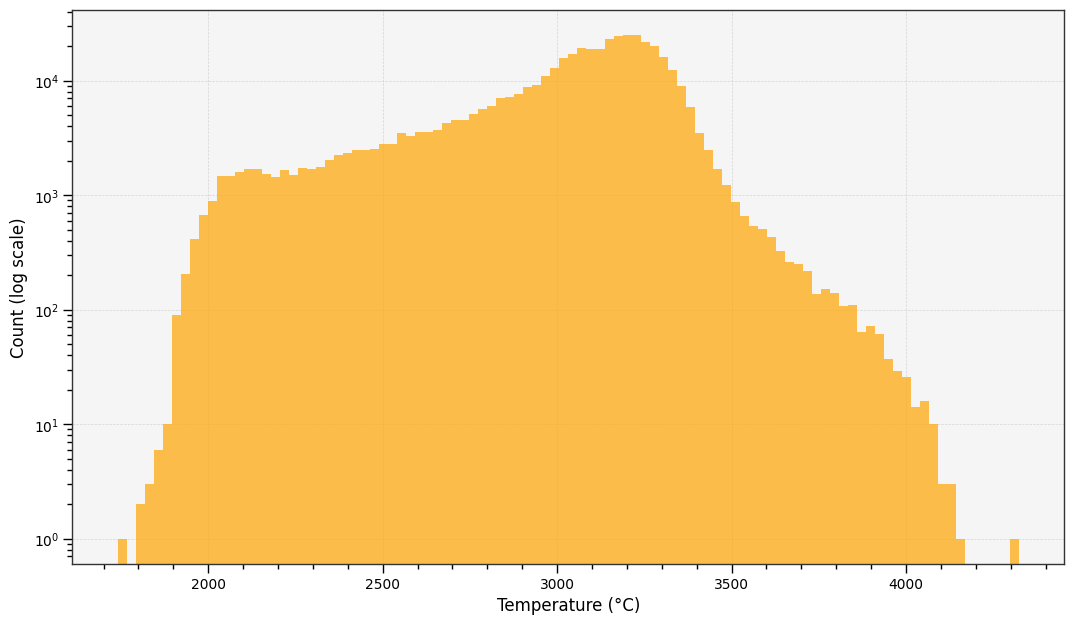

temperature_image range: 2013.32921861 4597.83368213


In [33]:
temp_celsius = temperature_image - 273.15

# Flatten the array to 1D (excluding nans) for histogram
valid_temps = temp_celsius[~np.isnan(temp_celsius)]

plt.hist(valid_temps, bins=100, color='orange', alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

plt.hist(valid_temps, bins=100, color='orange', alpha=0.7)
plt.yscale('log')
plt.xlabel("Temperature (°C)")
plt.ylabel("Count (log scale)")
plt.show()

print("temperature_image range:",
      np.nanmin(temperature_image),
      np.nanmax(temperature_image))


### 7.1 Heatmap

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap

https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [63]:
mean_temp_c = np.nanmean(temp_celsius)
print(f"Mean temperature: {mean_temp_c:.2f} °C")

Mean temperature: 2469.82 °C


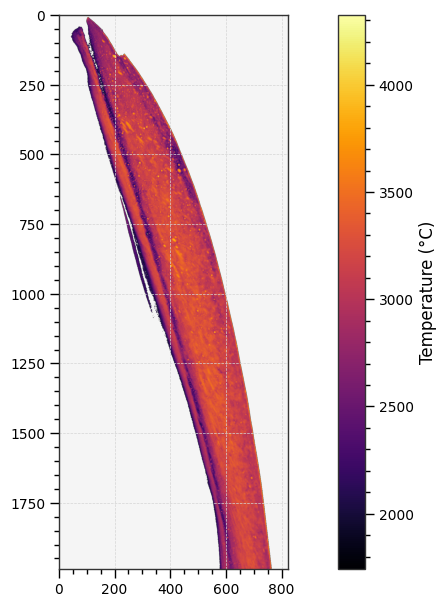

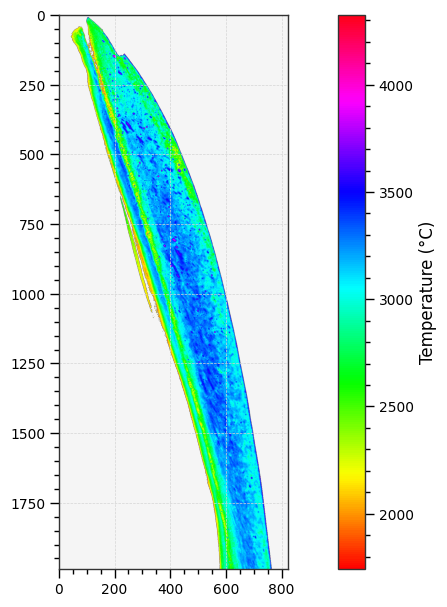

In [35]:
plt.imshow(temp_celsius, cmap='inferno', origin='lower')
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label='Temperature (°C)')
plt.show()

plt.imshow(temp_celsius, cmap='hsv', origin='lower')
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label='Temperature (°C)')
plt.show()